In [34]:
import os
import pickle

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

import shap

In [51]:
def save_results(save_model_in, save_figures_in):
    directory = os.path.dirname(save_model_in)

    with open(save_model_in, 'rb') as f:
        model = pickle.load(f)

    with open(os.path.join(directory, "X.pkl"), 'rb') as f:
        X = pickle.load(f)

    with open(os.path.join(directory, "y.pkl"), 'rb') as f:
        y = pickle.load(f)
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X)
    
    if save_figures_in is not None:
        directory = os.path.dirname(save_figures_in)
        if not os.path.exists(directory):
            os.makedirs(directory)
    
        shap.initjs()
        shap.summary_plot(shap_values, X, plot_type="bar", show=False) 
        plt.savefig(os.path.join(save_figures_in, "features_importance_plot.jpg"),
                    dpi=1000,
                    bbox_inches='tight')
        plt.show()
        
        
        shap.summary_plot(shap_values, X, show=False) 
        plt.savefig(os.path.join(save_figures_in, "summary_plot.jpg"),
                    dpi=1000,
                    bbox_inches='tight')
        plt.show()
    
    return True


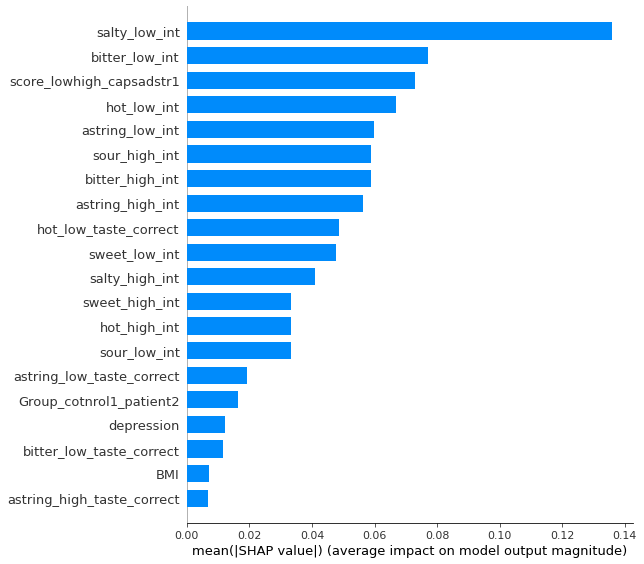

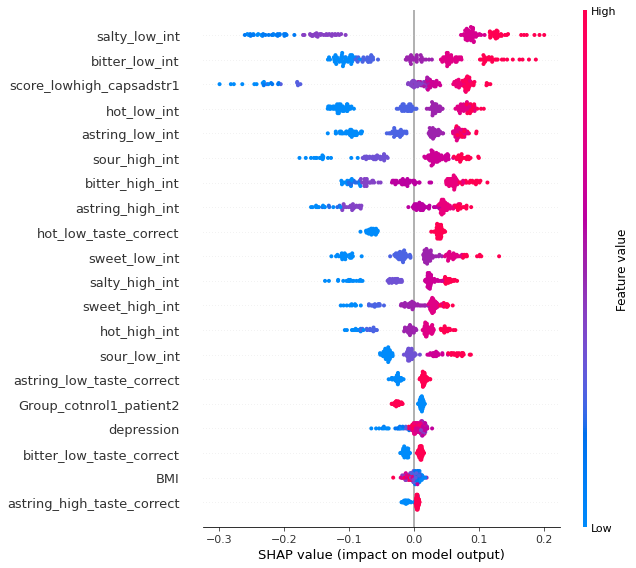

True

In [52]:
save_model_in = "/Users/lalachaimaenaciri/PycharmProjects/SCORE_LOW_HIGH_CAPSADSTR_INTENSITY/models/rf_model.pkl"               
save_figures_in = "/Users/lalachaimaenaciri/PycharmProjects/SCORE_LOW_HIGH_CAPSADSTR_INTENSITY/reports/figures/"               


save_results(save_model_in, save_figures_in)